# [실습] LangGraph 기초


# 🧠 LangGraph 실습 전체 구조, 쉽게 이해하기

---

## 🚀 먼저, 이 실습은 무엇을 하려는 걸까요?

우리는 지금 "AI가 어떤 일을 대신 처리하도록 시키는 과정"을 배우고 있습니다.  
그런데 이 과정을 **일직선 코드가 아닌 ‘그래프’라는 흐름도 형식**으로 표현하고 실행하는 것이 핵심입니다.

즉, **AI가 차례차례 일을 하도록 ‘점과 선’으로 된 설계도**를 만든다고 이해하면 됩니다.  
이때 사용되는 도구가 바로 👉 **LangGraph**입니다.

---

## 📌 LangGraph란 무엇인가요?

LangGraph는 마치 "AI 비서를 위한 업무 플로우 차트"입니다.

- **점(Node)**: 각각의 일처리를 담당하는 작은 AI 기능입니다. (예: 계산, 농담 생성, 검색 등)
- **선(Edge)**: 한 단계에서 다음 단계로 연결되는 경로입니다.
- **가방(State)**: 데이터가 들어 있는 상태 상자입니다. AI가 일할 때 주고받는 자료가 여기 담깁니다.

→ 이 세 가지 요소로 **AI 작업 흐름 전체를 설계**합니다.

---

## ✈️ 예를 들어, 이런 흐름이 있다고 상상해 보세요

1. AI는 "출발점(START)"에서 시작합니다.
2. 어떤 숫자가 들어오면 **제곱근을 계산**합니다.
3. 그 숫자에 맞게 **짧은 농담을 생성**합니다.
4. 어떤 질문이 주어지면 적절한 **검색어를 만들고**, 웹에서 **자료를 검색하고**, **답을 작성**합니다.
5. 마지막으로 "도착점(END)"에 도달합니다.

이 흐름이 모두 LangGraph로 구성됩니다!

---

## 🧰 이 시스템을 만들기 위한 3가지 구성요소

| 구성 요소 | 역할 | 쉬운 비유 |
|-----------|-------|-----------|
| **State** | 지금까지의 데이터 상태 | 여행가방, 서류 가방 |
| **Node**  | 한 가지 기능을 수행하는 단계 | 정류장, 일처리 AI |
| **Edge**  | 다음 단계로 이어지는 경로 | 버스 노선, 연결선 |

---

## 🧩 우리가 지금 실습에서 하는 일 요약

1. **State 정의**: 어떤 정보(데이터)를 주고받을 것인지 명시합니다. 예: 숫자, 결과, 비밀 등
2. **Node 만들기**: 각 단계에서 어떤 처리를 할지를 함수로 정의합니다.
3. **Edge 구성**: 각 노드들이 어떤 순서로 연결될지 선을 그립니다.
4. **Graph 실행**: 이 흐름도를 바탕으로 AI가 실제로 작동하게 만듭니다.
5. **LLM 활용 추가**: 노드 안에서 LLM(Gemini 등)을 불러서 농담 생성, 검색 등 복잡한 작업도 가능하게 합니다.
6. **웹 검색 추가**: 질문을 주면 검색어를 만들고, 검색 결과를 가져와 AI가 답을 씁니다.

---

## 🎯 핵심 요약

> LangGraph는 **AI가 일하는 과정을 그래프(흐름도)**로 설계해서 실행하는 도구입니다.  
> 이 안에는 상태(State), 단계(Node), 연결선(Edge)이 명확히 구성되어 있으며,  
> 각 단계를 함수로 만들어 놓고, 순서를 따라 AI가 일을 진행하게 합니다.

이 개념을 이해하고 나면, 복잡한 AI 자동화도 **한눈에 파악 가능한 형태**로 만들 수 있습니다.



기본 라이브러리를 설치합니다.

In [ ]:
!pip install --upgrade langgraph langchain langchain_google_genai langchain_community
# ✅ 필요한 라이브러리 설치
# LangGraph, LangChain 및 관련 Google Gemini API, Community 기능을 사용하기 위해 최신 버전으로 업그레이드합니다.
# 강의 시 포인트: LangGraph는 'AI 자동화 플로우'를 그래프 형태로 구성할 수 있는 매우 유용한 도구입니다.


# Graph의 구성 요소: State, Node, Edge, Graph


시작 지점과 끝 지점을 표시한 그래프를 구성하고, 전체 그래프를 `invoke()`를 통해 실행합니다.

그래프는 점과 선으로 구성되는데요.  



이를 노드(Node, 정점), 엣지(Edge, 간선)라고 부릅니다.    

각각의 노드는 LLM 호출을 비롯한 하나의 기능을 수행하게 되며, 기능과 기능 사이의 연결을 엣지로 구성합니다.

### State

LangGraph의 Workflow는 State Diagram으로 볼 수 있습니다.   

전체 Workflow에서, State는 초기 State에서 시작해    
Node와 Edge를 통과하며 그 값이 수정되거나 추가되는 과정을 거치게 됩니다.   
  



State의 구조는 보통 가시성을 위해 타입 표시를 병행합니다.   
`TypedDict`나 `Pydantic`중 편한 것을 사용하면 되는데요.   
이번 교재에서는 공식 문서와 동일한 `TypedDict`를 사용하겠습니다.

In [ ]:
from typing_extensions import TypedDict

# ✅ TypedDict는 딕셔너리의 구조(키와 값의 타입)를 명확하게 정의할 수 있게 도와줍니다.
# 큰 프로젝트에서 안정적인 코드 작성을 위해 유용해요.

# 📌 State는 그래프에서 데이터를 전달하고 저장하는 "중간 저장소" 역할을 합니다.
# 쉽게 말해 여러 노드를 거치며 정보를 담아가는 "여행 가방"입니다.
class State(TypedDict):
    result: str  # 지금까지 처리된 결과를 저장 (예: "1번 노드를 통과했습니다\n")
    secret: str  # 시스템에서만 사용하는 비밀 정보 (예: 비밀 키, 인증 코드 등)


### Node

노드는 함수로 정의되는데, 주로 하나의 모듈을 하나의 노드로 구성합니다.   
State는 노드를 지나며 새로운 정보를 추가하거나, 값을 수정할 수 있습니다.

In [ ]:
# ✅ 첫 번째 노드 함수 정의
# 이 노드는 상태(state) 안의 'result'에 문자열을 추가하여 반환합니다.

def first(state):
    print("---Node 1---")  # 실행 시, 어떤 노드가 실행 중인지 로그로 표시됩니다.
    return {"result": state['result'] +"랭그래프 1번 노드 통과\n"}
    # 기존 'result' 문자열에 1번 노드를 통과했다는 문장을 덧붙입니다.


# ✅ 두 번째 노드 함수 정의
# 1번 노드와 동일한 방식으로 작동하며, 2번 노드를 통과했다는 메시지를 추가합니다.
def second(state):
    print("---Node 2---")
    return {"result": state['result'] +"랭그래프 2번 노드 통과\n"}


### Edge와 Graph   

위에서 설정한 State를 이용하여 Graph를 정의합니다.

그래프에 노드와 엣지를 추가합니다.    
START와 END를 import하고, 시작점과 끝점을 정의합니다.

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# ✅ LangGraph의 핵심: 그래프 객체를 만들고 흐름을 설계하는 부분입니다.
# builder = 그래프를 구성하는 설계자 역할입니다.

builder = StateGraph(State)  # 아까 만든 State 구조를 기반으로 그래프를 만듭니다.


# ✅ 노드를 그래프에 추가
# 'first'라는 이름의 노드를 first() 함수와 연결합니다.
# 'second'도 마찬가지입니다.

builder.add_node("first", first)
builder.add_node("second", second)


 # ✅ 각 노드들을 연결하는 엣지(Edge)를 추가합니다.
# 포인트! 각 노드가 어떤 순서로 실행될지를 설정하는 "길"을 만들어주는 단계입니다.

builder.add_edge(START, "first")     # 시작 지점에서 first 노드로 이동
builder.add_edge("first", "second")  # first → second로 연결
builder.add_edge("second", END)      # second → 끝 지점(END)으로 이동


만든 그래프는 `compile()`을 통해 실행 가능한 Runnable 구조로 만들어집니다.

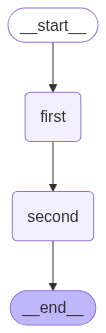

In [ ]:
graph = builder.compile()
# ✅ 그래프 컴파일: 설계한 노드와 경로를 실제 실행 가능한 형태로 만듭니다.
# 마치 레고 조각을 조립한 후, 완성품을 작동시키는 단계라고 생각하시면 됩니다.

graph
# ✅ Colab에서는 이 객체를 출력하면 Mermaid 형식의 간단한 그래프 시각화도 지원합니다.
# (Colab 환경에서만 가능)

구성된 graph를 실행해 보겠습니다!   
state의 초기 상태를 Dictionary 형태로 전달합니다.

In [ ]:
# ✅ 실제로 그래프를 실행해봅니다.
# 초기 상태(State)는 딕셔너리 형태로 제공해야 하며,
# 여기서 'result'는 시작 메시지, 'secret'은 테스트용 비밀 값을 넣습니다.

response = graph.invoke({'result':'시작!\n', 'secret':'비밀'})
response
# ✅ 결과: 두 개의 노드를 차례대로 거치며, 'result'에 메시지가 순서대로 추가됩니다.
# 출력 예시:
# {
#   'result': '시작!\n랭그래프 1번 노드 통과\n랭그래프 2번 노드 통과\n',
#   'secret': '비밀'
# }


---Node 1---
---Node 2---


{'result': '시작!\n랭그래프 1번 노드 통과\n랭그래프 2번 노드 통과\n', 'secret': '비밀'}

## 그래프에 LLM 포함시키기
이번에는 값이 여러 개인 State를 구성하고, 그래프로 만들어 보겠습니다.   
llm도 활용해 보겠습니다.

In [ ]:
import os
# os.environ['GOOGLE_API_KEY'] = 
from langchain_core.rate_limiters import InMemoryRateLimiter
from langchain_google_genai import ChatGoogleGenerativeAI
# ✅ Gemini API는 분당 10개 요청 제한이 있기 때문에, 속도 제한을 걸어야 합니다.

rate_limiter = InMemoryRateLimiter(
    requests_per_second=0.167,  # 초당 약 0.167회 → 분당 10회 (10/60)
    check_every_n_seconds=0.1,  # 0.1초마다 체크
    max_bucket_size=10,         # 짧은 시간에 몰아 보낼 수 있는 최대 개수
)
# ✅ 이제 제한을 건 상태로 Gemini 모델을 초기화합니다.
# 📌 포인트! 'gemini-2.0-flash-exp' 모델은 빠르고 저렴한 응답용 모델입니다.

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",  # 사용할 Gemini 모델 이름
    rate_limiter=rate_limiter     # 위에서 만든 요청 제한 장치 적용
)


3개의 요소가 포함된 State를 구성합니다.

In [ ]:
# ✅ 이번 예제의 State 정의
# 📌 포인트! LangGraph는 State 안에 어떤 데이터가 들어오고 나가는지를 정확히 정의해야 합니다.

class State(TypedDict):
    integer: int  # 사용자로부터 입력받은 정수값 (예: 16)
    root: int     # 위 정수의 제곱근 결과
    joke: str     # 제곱근 숫자에 기반해 생성된 짧은 농담


2개의 노드를 구성합니다.

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# ✅ 첫 번째 노드 함수: 정수의 제곱근을 계산
def get_root(state):
    return {"root": int(state["integer"] ** 0.5)}
    # 📌 예시: 16이 들어오면 → 4로 변환되어 'root'에 저장
    # int()로 소수점 없이 정수만 저장합니다.

# ✅ 두 번째 노드 함수: 제곱근 길이에 맞는 영어 농담 생성
def get_joke(state):
    prompt = ChatPromptTemplate([
        ('system', '당신은 언어 유희의 달인입니다.'),  # AI에게 역할을 부여하는 시스템 메시지
        ('user','{length} 문장 길이의 짧은 영어 유머를 만들어주세요. 각 문장마다 숫자를 붙이세요.')  # 실제 사용자 요청
    ])

    chain = prompt | llm | StrOutputParser()
    return {"joke": chain.invoke({'length': state['root']})}
    # 📌 포인트!
    # 예: root가 4면, "4문장으로 된 영어 유머"를 생성하게 됩니다.
    # '|' 연산자는 LangChain에서 프롬프트 → LLM → 출력 파서를 연결하는 파이프라인 역할을 합니다.


그래프를 구성합니다.

In [ ]:
# ✅ 그래프 구성 시작
# 📌 LangGraph에서는 builder라는 설계자를 만들어 그래프 흐름을 그립니다.
# 주의! 이미 만들어진 그래프에 노드를 다시 추가하면 에러가 날 수 있으니, builder는 새로 시작해야 합니다.

builder = StateGraph(State)

# ✅ 각 노드를 그래프에 등록합니다.
builder.add_node("get_root", get_root)   # 입력된 숫자 → 제곱근 계산 노드
builder.add_node("get_joke", get_joke)   # 제곱근 → 영어 농담 생성 노드

# ✅ 노드 간의 연결 경로 정의 (엣지 설정)
builder.add_edge(START, "get_root")      # 시작점 → 제곱근 계산 노드
builder.add_edge("get_root", "get_joke") # 제곱근 → 농담 생성
builder.add_edge("get_joke", END)        # 농담 생성 후 → 끝


그래프를 컴파일하고 실행합니다.

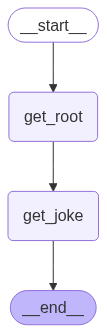

In [ ]:
graph = builder.compile()
# ✅ 모든 구성 완료 후, 그래프를 실행 가능한 상태로 컴파일
# 📌 컴파일은 '설계한 그래프를 실제로 작동하게 만드는 단계'입니다.
graph
# ✅ Colab에서는 이 graph 객체를 출력하면 시각적인 그래프가 Mermaid 형식으로 나타납니다.


In [ ]:
# ✅ 그래프 실행 예제
initial_state = {'integer': 16}  # 입력 숫자는 16

response = graph.invoke(initial_state)
# ✅ invoke는 그래프를 실제로 실행시키는 함수입니다.
# 결과적으로 'root'와 'joke'가 채워진 상태를 반환합니다.

response
# 예시 출력:
# {
#   'integer': 16,
#   'root': 4,
#   'joke': '1. Why did four chickens cross the road?\n2. To get to the punchline...\n...'
# }


{'integer': 16,
 'root': 4,
 'joke': "알겠습니다. 다음은 제가 만든 유머입니다.\n\n1. Why did the scarecrow win an award?\n2. Because he was outstanding in his field!\n3. I'm not saying I'm lazy, but I once had a dream that I was drowning in an ocean of orange soda.\n4. Turns out it was just a Fanta sea."}

### 웹 검색 노드 만들기   


이번 실습에서는 웹 검색 툴 결과를 바탕으로, 실제 URL을 크롤링하여 문서의 내용을 가져오겠습니다.   

랭체인에서 웹 페이지를 크롤링하기 위해서는 대표적으로 아래 3개의 방법을 사용할 수 있습니다.

1. `WebBaseLoader` : BeautifulSoup4 기반의 기본 크롤러로, HTML 코드를 그대로 가져옵니다.
2. `Docling` : 다양한 포맷의 문서를 텍스트 포맷으로 변환하는 오픈 소스 프로젝트로, 유용하나 빠른 실행을 위해 GPU 성능이 다소 요구됩니다.
3. `FireCrawl`: API 기반의 유료 서비스로, 무료 라이센스는 총 500회 무료 사용이 가능합니다.   

이후의 프로젝트에서는 고성능 파서를 활용하지만, 이번 실습은 WebBaseLoader를 사용하겠습니다 :)

In [ ]:
# API 키와 사용자 에이전트 설정 (환경 변수에 저장)
# os.environ['TAVILY_API_KEY'] = 
os.environ['USER_AGENT'] = 'MyAgent'

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.document_loaders import WebBaseLoader

def tavily_search(State):
    # Tavily 검색 도구 객체 생성 (검색 결과 최대 5개)
    tavily_search = TavilySearchResults(max_results=5)

    # 검색 실행 (State 딕셔너리의 'query' 키에 있는 검색어 사용)
    search_results = tavily_search.invoke({'query': State['query']})
    # 반환값: {'url': ..., 'content': ...} 형식의 딕셔너리 리스트

    # PDF 파일은 제외하고 URL만 추출
    urls = [result['url'] for result in search_results if 'pdf' not in result['url']]

    # 웹 페이지 로더 생성
    # (SSL 인증 문제를 방지하기 위해 예외 처리 추가)
    try:
        loader = WebBaseLoader(urls)
    except:
        loader = WebBaseLoader(urls, requests_kwargs={'verify': False})

    # 문서 로드 (각 URL에서 텍스트 데이터 수집)
    documents = loader.load()

    # 수집된 문서를 context로 반환
    return {'context': documents}

# 함수 테스트 실행 (예: '멀티 에이전트 구조' 검색)
result = tavily_search({'query': '멀티 에이전트 구조'})
result  # 결과 출력


{'context': [Document(metadata={'source': 'https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91_%EC%97%90%EC%9D%B4%EC%A0%84%ED%8A%B8_%EC%8B%9C%EC%8A%A4%ED%85%9C', 'title': '다중 에이전트 시스템 - 위키백과, 우리 모두의 백과사전', 'language': 'ko'}, page_content='\n\n\n\n다중 에이전트 시스템 - 위키백과, 우리 모두의 백과사전\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문으로 이동\n\n\n\n\n\n\n\n주 메뉴\n\n\n\n\n\n주 메뉴\n사이드바로 이동\n숨기기\n\n\n\n\t\t둘러보기\n\t\n\n\n대문최근 바뀜요즘 화제임의의 문서로특수 문서 목록\n\n\n\n\n\n\t\t사용자 모임\n\t\n\n\n사랑방사용자 모임관리 요청\n\n\n\n\n\n\t\t편집 안내\n\t\n\n\n소개도움말정책과 지침질문방\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n보이기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n기부\n\n계정 만들기\n\n로그인\n\n\n\n\n\n\n\n\n개인 도구\n\n\n\n\n\n기부 계정 만들기 로그인\n\n\n\n\n\n\t\t로그아웃한 편집자를 위한 문서 더 알아보기\n\n\n\n기여토론\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차\n사이드바로 이동\n숨기기\n\n\n\n\n처음 위치\n\n\n\n\n\n1\n같이 보기\n\n\n\n\n\n\n\n\n2\n각주\n\n\n\n\n\n\n\n\n3\n참고 문헌\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

In [ ]:
def get_query(State):
    prompt = ChatPromptTemplate([
         ('user','''{question}에 답변하기 위해
인터넷 검색을 사용하려고 합니다.
적절한 검색어 쿼리를 하나만 출력하세요.
쿼리만 출력하세요.''')
    ])
    chain = prompt | llm | StrOutputParser()
    return {"query": chain.invoke(State)}
    # State를 모두 입력해도, Prompt Template에 포함된 입력변수만 전달


def answer_question(State):
    prompt = ChatPromptTemplate([
        ('system', '''당신은 QA(Question-Answering)을 수행하는 Assistant입니다.
다음의 Context를 이용하여 Question에 답변하세요.
정확한 답변을 제공하세요.
만약 모든 Context를 다 확인해도 정보가 없다면,
"정보가 부족하여 답변할 수 없습니다."를 출력하세요.'''),

        ('user', '''Context: {context}
---
Question: {question}''')])
    chain = prompt | llm | StrOutputParser()
    return {"answer": chain.invoke(State)}

State를 만들고, 그래프를 구성합니다.

In [ ]:
class State(TypedDict):
    question : str # 유저의 질문
    query: str # 질문에서 파생된 검색어
    answer: str # 답변
    context: str # 검색 결과


In [ ]:
# 그래프 구성
builder = StateGraph(State)

builder.add_node("get_query", get_query)
builder.add_node("tavily_search", tavily_search)
builder.add_node("answer_question", answer_question)

builder.add_edge(START, "get_query")
builder.add_edge("get_query", "tavily_search")
builder.add_edge("tavily_search", "answer_question")
builder.add_edge("answer_question", END)


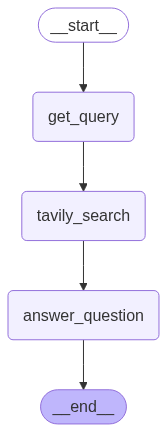

In [ ]:
graph = builder.compile()
graph

In [ ]:
result = graph.invoke({'question': ''})
result

{'question': '',
 'query': '메타버스 뜻',
 'answer': '메타버스의 의미는 무엇인가요?',
 'context': [Document(metadata={'source': 'https://ko.wikipedia.org/wiki/%EB%A9%94%ED%83%80%EB%B2%84%EC%8A%A4', 'title': '메타버스 - 위키백과, 우리 모두의 백과사전', 'language': 'ko'}, page_content='\n\n\n\n메타버스 - 위키백과, 우리 모두의 백과사전\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문으로 이동\n\n\n\n\n\n\n\n주 메뉴\n\n\n\n\n\n주 메뉴\n사이드바로 이동\n숨기기\n\n\n\n\t\t둘러보기\n\t\n\n\n대문최근 바뀜요즘 화제임의의 문서로\n\n\n\n\n\n\t\t사용자 모임\n\t\n\n\n사랑방사용자 모임관리 요청\n\n\n\n\n\n\t\t편집 안내\n\t\n\n\n소개도움말정책과 지침질문방\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n보이기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n기부\n\n계정 만들기\n\n로그인\n\n\n\n\n\n\n\n\n개인 도구\n\n\n\n\n\n기부 계정 만들기 로그인\n\n\n\n\n\n\t\t로그아웃한 편집자를 위한 문서 더 알아보기\n\n\n\n기여토론\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차\n사이드바로 이동\n숨기기\n\n\n\n\n처음 위치\n\n\n\n\n\n1\n정의\n\n\n\n\n\n\n\n\n2\n유래\n\n\n\n\n\n\n\n\n3\n메타버스의 네 가지 유형\n\n\n\n\n메타버스의 네

전체 결과가 잘 실행되었지만, 중간 결과가 보고 싶다면 어떻게 해야 할까요?   
이후에 배울 `LangSmith`를 통해 트래킹할 수도 있고, 아래의 코드로 각 단계를 스트리밍할 수도 있습니다.

In [ ]:
import pprint

# Streaming 참고
# https://langchain-ai.github.io/langgraph/concepts/streaming/#streaming-graph-outputs-stream-and-astream

for data in graph.stream({'question': '스탠포드의 멀티 에이전트 STORM 구조가 뭐야?'},
                         stream_mode='updates'):
    pprint.pprint(data)

{'get_query': {'query': 'Stanford Multi-Agent STORM'}}
{'tavily_search': {'context': [Document(metadata={'source': 'https://medium.com/@cognidownunder/stanford-storm-revolutionizing-ai-powered-knowledge-curation-35ce51996c19', 'title': 'Stanford STORM: Revolutionizing AI-Powered Knowledge Curation | by Cogni Down Under | Medium', 'description': 'In the ever-evolving landscape of artificial intelligence, a new player has emerged that promises to reshape how we approach knowledge curation and content generation. Enter Stanford STORM…', 'language': 'en'}, page_content='Stanford STORM: Revolutionizing AI-Powered Knowledge Curation | by Cogni Down Under | MediumSitemapOpen in appSign upSign inMedium LogoWriteSign upSign inStanford STORM: Revolutionizing AI-Powered Knowledge CurationCogni Down UnderFollow5 min read·Jul 23, 2024--3ListenSharenowledge CurationStanford STORM: Revolutionizing AI-Powered Knowledge CurationIn the ever-evolving landscape of artificial intelligence, a new player has